## Importando Bibliotecas e Lendo arquivo

In [73]:
!pip install -U plotly

In [74]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [75]:
df = pd.read_csv("historico_regiao_norte.csv")
df

,Unnamed: 0,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,1998,-,-,-,-,-,342,1753,13270,15944,6056,2004,1354,40723
1,1999,142,351,123,36,32,173,1506,9763,11330,8862,2825,860,36003
2,2000,72,160,399,59,155,400,1089,9964,8046,6236,3691,1891,32162
3,2001,157,678,1113,400,72,383,1631,14328,13462,7256,5855,3279,48614
4,2002,512,657,872,96,183,694,3585,33263,41759,19099,16917,6103,123740
5,2003,2749,1241,1646,517,556,1563,8081,25687,37595,19480,13658,10165,122938
6,2004,1804,544,558,508,825,2191,10360,32049,52442,17509,19837,12603,151230
7,2005,3652,420,531,242,517,1901,16008,52898,51224,20258,12512,4295,164458
8,2006,1209,622,606,451,400,1715,4804,28432,40201,16408,12438,6304,113590
9,2007,1330,1584,1140,373,918,2694,5249,40064,55304,21095,12741,3458,145950


## Tratamento do dataframe

In [76]:
df.drop([0 ,1,23,24,25,26], axis=0,inplace=True)
#Foram retirados as linhas dos anos 1998, 1999 e 2021 os quais não são objeto de estudo.
#Foram retiradas também as linhas com os dados de média, máximo e mínimo, pois, a análise será feita diretamente do Dataframe utilizando o Pandas.

In [77]:
#Criado uma nova coluna para o dado dos anos.
df["Ano"]= df["Unnamed: 0"]
df.drop("Unnamed: 0", axis=1,inplace=True)
df.set_index("Ano")

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
Ano,,,,,,,,,,,,,
2000,72,160,399,59,155,400,1089,9964,8046,6236,3691,1891,32162
2001,157,678,1113,400,72,383,1631,14328,13462,7256,5855,3279,48614
2002,512,657,872,96,183,694,3585,33263,41759,19099,16917,6103,123740
2003,2749,1241,1646,517,556,1563,8081,25687,37595,19480,13658,10165,122938
2004,1804,544,558,508,825,2191,10360,32049,52442,17509,19837,12603,151230
2005,3652,420,531,242,517,1901,16008,52898,51224,20258,12512,4295,164458
2006,1209,622,606,451,400,1715,4804,28432,40201,16408,12438,6304,113590
2007,1330,1584,1140,373,918,2694,5249,40064,55304,21095,12741,3458,145950
2008,711,397,747,403,357,1241,5129,19740,22348,20438,12190,3564,87265


In [78]:
#Verificanto o tipo dos dados colunares.
df.dtypes


Janeiro      object
Fevereiro    object
Março        object
Abril        object
Maio         object
Junho         int64
Julho         int64
Agosto        int64
Setembro      int64
Outubro       int64
Novembro     object
Dezembro     object
Total         int64
Ano          object
dtype: object

In [79]:
#Fazendo uma mudança do tipo dos dados colunáres para inteiro.
df.Janeiro = df.Janeiro.astype("int64")
df.Fevereiro = df.Fevereiro.astype("int64")
df.Março = df.Março.astype("int64")
df.Abril = df.Abril.astype("int64")
df.Maio = df.Maio.astype("int64")
df.Novembro = df.Novembro.astype("int64")
df.Dezembro = df.Dezembro.astype("int64")

#FAZER A MUDAÇA DOS DADOS DE ANO PARA DATA??
df.Ano = df.Ano.astype("int64")

In [80]:
#Novos tipos dos dados colunáres.
df.dtypes

Janeiro      int64
Fevereiro    int64
Março        int64
Abril        int64
Maio         int64
Junho        int64
Julho        int64
Agosto       int64
Setembro     int64
Outubro      int64
Novembro     int64
Dezembro     int64
Total        int64
Ano          int64
dtype: object

### Criando um Dataframe transposto para facilitar a criação de alguns graficos e algumas análises

In [81]:
df_transposta = df.T
colunas = df_transposta.loc['Ano'].to_list()
df_transposta.columns = colunas
df_transposta.drop(['Total','Ano'], inplace=True)
df_transposta
#da pra usar esse dataframe para fazer os gráficos de Meses X N° de focos

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Janeiro,72,157,512,2749,1804,3652,1209,1330,711,665,1383,614,836,893,1324,1565,4235,485,1188,895,868
Fevereiro,160,678,657,1241,544,420,622,1584,397,283,917,198,326,169,440,801,1199,202,713,900,737
Março,399,1113,872,1646,558,531,606,1140,747,374,883,239,310,402,705,309,1515,395,925,2705,986
Abril,59,400,96,517,508,242,451,373,403,331,542,309,350,405,422,429,615,317,358,1423,473
Maio,155,72,183,556,825,517,400,918,357,414,877,494,674,543,747,611,999,847,762,895,657
Junho,400,383,694,1563,2191,1901,1715,2694,1241,610,2602,1224,1407,1362,1829,1562,1980,1684,1688,2010,2017
Julho,1089,1631,3585,8081,10360,16008,4804,5249,5129,2166,6909,2824,3406,2812,2744,2989,6963,8428,4754,5472,6941
Agosto,9964,14328,33263,25687,32049,52898,28432,40064,19740,9365,43835,8267,20745,9128,18685,19691,18183,20742,10120,28439,27304
Setembro,8046,13462,41759,37595,52442,51224,40201,55304,22348,19690,43523,17532,24135,15047,18698,27301,17683,33341,22169,18934,26828
Outubro,6236,7256,19099,19480,17509,20258,16408,21095,20438,16829,12899,9180,14581,10443,12748,18633,13601,13257,10229,7383,16214


In [82]:
#Verificação dos tipos da transposta
df_transposta.dtypes

2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
2020    int64
dtype: object

##Analise Estatistica dos dados

In [83]:
df.describe()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1292.714286,628.000000,826.666667,429.666667,595.380952,1559.857143,5349.714286,23377.571429,28917.238095,14465.523810,10840.238095,5111.809524,93394.380952,2010.000000
std,1064.189464,385.421717,581.287307,263.406783,264.538934,642.756741,3450.530918,12182.460390,13925.105834,4681.823743,4156.221624,2758.787988,35879.220477,6.204837
min,72.000000,160.000000,239.000000,59.000000,72.000000,383.000000,1089.000000,8267.000000,8046.000000,6236.000000,3691.000000,1380.000000,32162.000000,2000.000000
25%,665.000000,326.000000,399.000000,331.000000,414.000000,1241.000000,2824.000000,14328.000000,18698.000000,10443.000000,7743.000000,3367.000000,71099.000000,2005.000000
50%,895.000000,622.000000,705.000000,403.000000,611.000000,1684.000000,4804.000000,20742.000000,24135.000000,14581.000000,11587.000000,4295.000000,87265.000000,2010.000000
75%,1383.000000,801.000000,986.000000,473.000000,825.000000,1980.000000,6941.000000,28439.000000,40201.000000,18633.000000,12741.000000,6235.000000,122938.000000,2015.000000
max,4235.000000,1584.000000,2705.000000,1423.000000,999.000000,2694.000000,16008.000000,52898.000000,55304.000000,21095.000000,19837.000000,12603.000000,164458.000000,2020.000000


In [84]:
df_transposta.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000
mean,2680.166667,4051.166667,10311.666667,10244.833333,12602.500000,13704.833333,9465.833333,12162.50000,7272.083333,5924.916667,10582.000000,4530.833333,6858.75000,4417.500000,6225.583333,8047.333333,6751.166667,8187.25000,5169.083333,6713.250000,7536.916667
std,3509.342876,5151.797124,14388.472844,11920.927418,16088.571424,19134.932396,12938.809077,17962.58372,8856.790466,7442.921219,15938.355139,5361.855748,8664.73101,4918.267516,7082.037938,9495.314867,6560.787049,10364.67671,6527.360506,8616.825044,10138.777176
min,59.000000,72.000000,96.000000,517.000000,508.000000,242.000000,400.000000,373.00000,357.000000,283.000000,542.000000,198.000000,310.00000,169.000000,422.000000,309.000000,615.000000,202.00000,358.000000,895.000000,473.000000
25%,158.750000,395.750000,620.750000,1482.500000,758.250000,527.500000,618.000000,1282.50000,634.000000,404.000000,908.500000,447.750000,593.00000,508.500000,736.500000,753.500000,1436.000000,462.50000,884.250000,1292.250000,835.250000
50%,744.500000,1372.000000,2228.500000,5415.000000,6275.500000,3973.500000,3259.500000,3076.00000,2402.500000,1415.500000,2984.500000,2024.000000,2406.50000,2087.000000,2286.500000,2277.000000,4123.500000,3847.00000,1534.000000,2500.500000,2419.000000
75%,4327.250000,6205.250000,17462.500000,15113.500000,18091.000000,17070.500000,13430.500000,14829.50000,14077.500000,10922.250000,10160.000000,7738.250000,12335.50000,7108.250000,10784.500000,15308.250000,10922.000000,12718.50000,8337.250000,7839.000000,9259.250000
max,9964.000000,14328.000000,41759.000000,37595.000000,52442.000000,52898.000000,40201.000000,55304.00000,22348.000000,19690.000000,43835.000000,17532.000000,24135.00000,15047.000000,18698.000000,27301.000000,18183.000000,33341.00000,22169.000000,28439.000000,27304.000000


In [85]:
#add coluna com médias anuais
df["Medias"]= df.Total/12

#Média anual de focos de queimadas
mediaAnual = df.Medias.mean()
desvioAnual = df.Medias.std()
print(mediaAnual)
print(desvioAnual)

7782.865079365079
2989.935039762127


In [86]:
#Anos com número de focos mair que a média
print("A média anual foi: ", mediaAnual)
print("\nAbaixo estão os anos com número de focos maior que a média\n")
df[df.Medias>=mediaAnual]

A média anual foi:  7782.865079365079

Abaixo estão os anos com número de focos maior que a média



,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
4,512,657,872,96,183,694,3585,33263,41759,19099,16917,6103,123740,2002,10311.666667
5,2749,1241,1646,517,556,1563,8081,25687,37595,19480,13658,10165,122938,2003,10244.833333
6,1804,544,558,508,825,2191,10360,32049,52442,17509,19837,12603,151230,2004,12602.500000
7,3652,420,531,242,517,1901,16008,52898,51224,20258,12512,4295,164458,2005,13704.833333
8,1209,622,606,451,400,1715,4804,28432,40201,16408,12438,6304,113590,2006,9465.833333
9,1330,1584,1140,373,918,2694,5249,40064,55304,21095,12741,3458,145950,2007,12162.500000
12,1383,917,883,542,877,2602,6909,43835,43523,12899,9247,3367,126984,2010,10582.000000
17,1565,801,309,429,611,1562,2989,19691,27301,18633,14200,8477,96568,2015,8047.333333
19,485,202,395,317,847,1684,8428,20742,33341,13257,12539,6010,98247,2017,8187.250000


In [87]:
#Verificação do número de anos acima da média anual
df[df.Medias>=mediaAnual].shape

(9, 15)

In [88]:
#Anos com número de focos menor que a média
print("A média anual foi: ", mediaAnual)
print("\nAbaixo estão os anos com número de focos menor que a média\n")
df[df.Medias<=mediaAnual]

A média anual foi:  7782.865079365079

Abaixo estão os anos com número de focos menor que a média



,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
2,72,160,399,59,155,400,1089,9964,8046,6236,3691,1891,32162,2000,2680.166667
3,157,678,1113,400,72,383,1631,14328,13462,7256,5855,3279,48614,2001,4051.166667
10,711,397,747,403,357,1241,5129,19740,22348,20438,12190,3564,87265,2008,7272.083333
11,665,283,374,331,414,610,2166,9365,19690,16829,15594,4778,71099,2009,5924.916667
13,614,198,239,309,494,1224,2824,8267,17532,9180,7562,5927,54370,2011,4530.833333
14,836,326,310,350,674,1407,3406,20745,24135,14581,11587,3948,82305,2012,6858.750000
15,893,169,402,405,543,1362,2812,9128,15047,10443,5371,6435,53010,2013,4417.500000
16,1324,440,705,422,747,1829,2744,18685,18698,12748,10130,6235,74707,2014,6225.583333
18,4235,1199,1515,615,999,1980,6963,18183,17683,13601,10029,4012,81014,2016,6751.166667
20,1188,713,925,358,762,1688,4754,10120,22169,10229,7743,1380,62029,2018,5169.083333


In [89]:
#Verificação do número de anos abaixo da média anual
df[df.Medias<=mediaAnual].shape

(12, 15)

Maior número de focos de queimadas em um ano

In [90]:
maxAnual = df.Total.max()
df[df.Total == maxAnual]

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
7,3652,420,531,242,517,1901,16008,52898,51224,20258,12512,4295,164458,2005,13704.833333


Menor número de focos de queimadas em um ano

In [91]:
minAnual = df.Total.min()
df[df.Total == minAnual]

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
2,72,160,399,59,155,400,1089,9964,8046,6236,3691,1891,32162,2000,2680.166667


###Descretização por médias anuais

In [92]:
counts = pd.cut(df['Medias'], 5).value_counts()
counts

(4885.1, 7090.033]      6
(9294.967, 11499.9]     4
(7090.033, 9294.967]    4
(2669.142, 4885.1]      4
(11499.9, 13704.833]    3
Name: Medias, dtype: int64

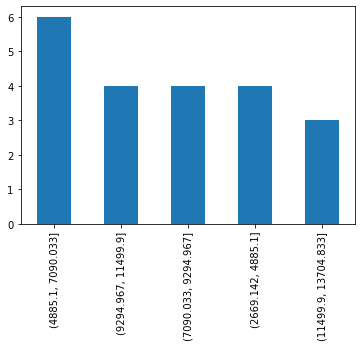

In [93]:
#Histograma de frequências do número de focos
counts
counts.plot.bar(x= 'Intervalo do Nº de focos de queimadas', y='Fraquência')

#Adicionar legendas para os eixos e ordenar os valores do eixo x 

##Estudo comparativo mensal - Gráfico Anos x N° de focos e Boxplot

In [94]:
titX = dict(title = 'Anos')
titY = dict(title = 'Queimadas')

titulo = 'Nº de focos de queimadas por mês entre os anos de 2000 e 2020'
meses = df.iloc[:,0:12].columns.to_list()

fig1 = px.line(df,x='Ano',y=meses)
fig1.update_layout(
    title = titulo,
    xaxis = titX,
    yaxis = titY,
    legend_title = 'Meses'
)
fig1.show()

###Janeiro

Maxímo: 4235.0 
Mínimo: 72.0 
Média: 1292.7142857142858 
Desvio: 1064.1894635287995


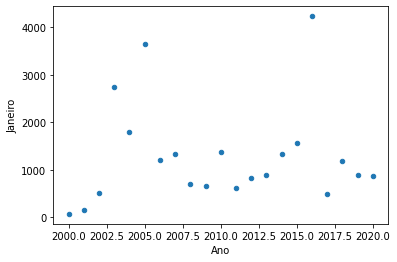

In [95]:
max_jan = df.max()["Janeiro"]
min_jan = df.min()["Janeiro"]
med_jan = df.mean()["Janeiro"]
desv_jan = df.std()["Janeiro"]
df.plot.scatter(x='Ano',y="Janeiro")
print(f"Maxímo: {max_jan} \nMínimo: {min_jan} \nMédia: {med_jan} \nDesvio: {desv_jan}")

In [96]:
hJaneiro = px.histogram(df,x='Janeiro')
hJaneiro.show()

In [97]:
px.box(df['Janeiro'])

###Fevereiro

Maxímo: 1584.0 
Mínimo: 160.0 
Média: 628.0 
Desvio: 385.4217170840273


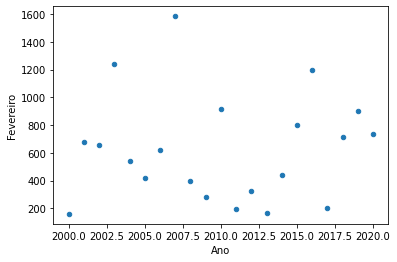

In [98]:
max_fev = df.max()["Fevereiro"]
min_fev = df.min()["Fevereiro"]
med_fev = df.mean()["Fevereiro"]
desv_fev = df.std()["Fevereiro"]
df.plot.scatter(x='Ano',y="Fevereiro")
print(f"Maxímo: {max_fev} \nMínimo: {min_fev} \nMédia: {med_fev} \nDesvio: {desv_fev}")

In [99]:
hFevereiro = px.histogram(df,x='Fevereiro')
hFevereiro.show()

In [100]:
px.box(df['Fevereiro'])

###Março

Maxímo: 2705.0 
Mínimo: 239.0 
Média: 826.6666666666666 
Desvio: 581.2873070464668


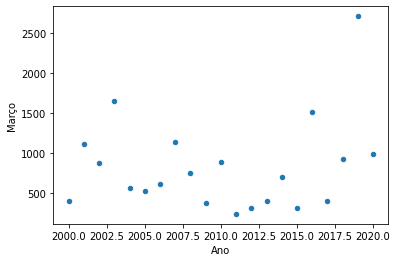

In [101]:
max_mar = df.max()["Março"]
min_mar = df.min()["Março"]
med_mar = df.mean()["Março"]
desv_mar = df.std()["Março"]
df.plot.scatter(x='Ano',y="Março")
print(f"Maxímo: {max_mar} \nMínimo: {min_mar} \nMédia: {med_mar} \nDesvio: {desv_mar}")

In [102]:
hMarco = px.histogram(df,x='Março')
hMarco.show()

In [103]:
px.box(df['Março'])

###Abril

Maxímo: 1423.0 
Mínimo: 59.0 
Média: 429.6666666666667 
Desvio: 263.40678300555084


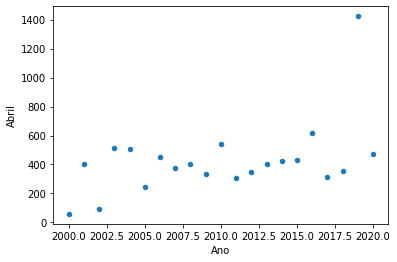

In [104]:
max_abr = df.max()["Abril"]
min_abr = df.min()["Abril"]
med_abr = df.mean()["Abril"]
desv_abr = df.std()["Abril"]
df.plot.scatter(x='Ano',y="Abril")
print(f"Maxímo: {max_abr} \nMínimo: {min_abr} \nMédia: {med_abr} \nDesvio: {desv_abr}")

In [105]:
hAbril = px.histogram(df,x='Abril')
hAbril.show()

In [106]:
px.box(df['Abril'])

###Maio

Maxímo: 999.0 
Mínimo: 72.0 
Média: 595.3809523809524 
Desvio: 264.5389340324929


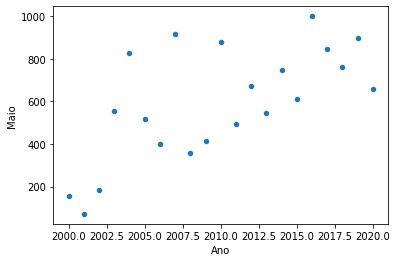

In [107]:
max_mai = df.max()["Maio"]
min_mai = df.min()["Maio"]
med_mai = df.mean()["Maio"]
desv_mai = df.std()["Maio"]
df.plot.scatter(x='Ano',y="Maio")
print(f"Maxímo: {max_mai} \nMínimo: {min_mai} \nMédia: {med_mai} \nDesvio: {desv_mai}")

In [108]:
hMaio = px.histogram(df,x='Maio')
hMaio.show()

In [109]:
px.box(df['Maio'])

###Junho

Maxímo: 2694.0 
Mínimo: 383.0 
Média: 1559.857142857143 
Desvio: 642.7567413659918


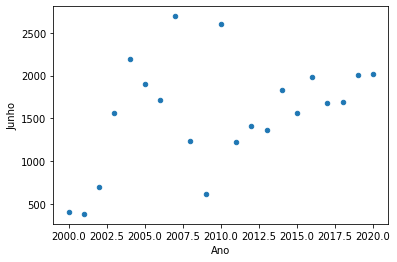

In [110]:
max_jun = df.max()["Junho"]
min_jun = df.min()["Junho"]
med_jun = df.mean()["Junho"]
desv_jun = df.std()["Junho"]
df.plot.scatter(x='Ano',y="Junho")
print(f"Maxímo: {max_jun} \nMínimo: {min_jun} \nMédia: {med_jun} \nDesvio: {desv_jun}")

In [111]:
hJunho = px.histogram(df,x='Junho')
hJunho.show()

In [112]:
px.box(df['Junho'])

###Julho

Maxímo: 16008.0 
Mínimo: 1089.0 
Média: 5349.714285714285 
Desvio: 3450.5309177408794


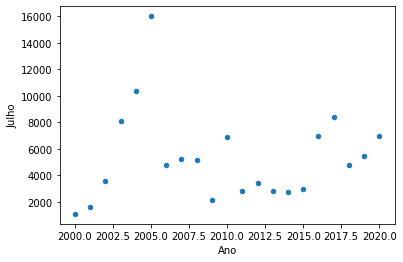

In [113]:
max_jul = df.max()["Julho"]
min_jul = df.min()["Julho"]
med_jul = df.mean()["Julho"]
desv_jul = df.std()["Julho"]
df.plot.scatter(x='Ano',y="Julho")
print(f"Maxímo: {max_jul} \nMínimo: {min_jul} \nMédia: {med_jul} \nDesvio: {desv_jul}")

In [114]:
hJulho = px.histogram(df,x='Julho')
hJulho.show()

In [115]:
px.box(df['Julho'])

###Agosto

Maxímo: 52898.0 
Mínimo: 8267.0 
Média: 23377.571428571428 
Desvio: 12182.460390132317


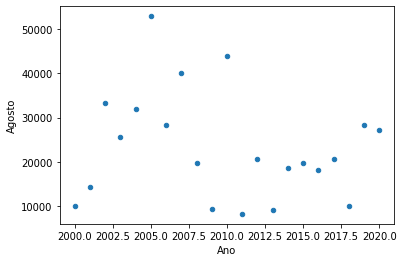

In [116]:
max_ago = df.max()["Agosto"]
min_ago = df.min()["Agosto"]
med_ago = df.mean()["Agosto"]
desv_ago = df.std()["Agosto"]
df.plot.scatter(x='Ano',y="Agosto")
print(f"Maxímo: {max_ago} \nMínimo: {min_ago} \nMédia: {med_ago} \nDesvio: {desv_ago}")

In [117]:
hAgosto= px.histogram(df,x='Agosto')
hAgosto.show()

In [118]:
px.box(df['Agosto'])

###Setembro

Maxímo: 55304.0 
Mínimo: 8046.0 
Média: 28917.238095238095 
Desvio: 13925.10583408529


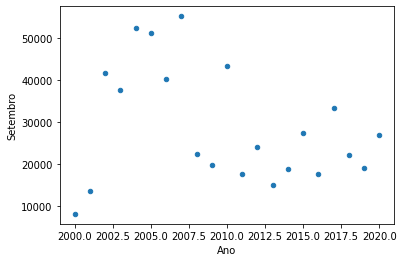

In [119]:
max_set = df.max()["Setembro"]
min_set = df.min()["Setembro"]
med_set = df.mean()["Setembro"]
desv_set = df.std()["Setembro"]
df.plot.scatter(x='Ano',y="Setembro")
print(f"Maxímo: {max_set} \nMínimo: {min_set} \nMédia: {med_set} \nDesvio: {desv_set}")

In [120]:
hSetembro = px.histogram(df,x='Setembro')
hSetembro.show()

In [121]:
px.box(df['Setembro'])

###Outubro

Maxímo: 21095.0 
Mínimo: 6236.0 
Média: 14465.52380952381 
Desvio: 4681.823743148045


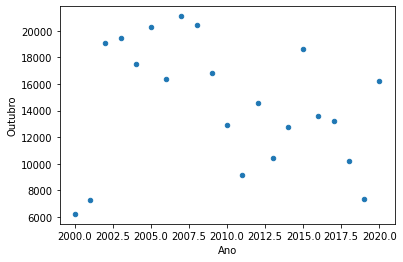

In [122]:
max_out = df.max()["Outubro"]
min_out = df.min()["Outubro"]
med_out = df.mean()["Outubro"]
desv_out = df.std()["Outubro"]
df.plot.scatter(x='Ano',y="Outubro")
print(f"Maxímo: {max_out} \nMínimo: {min_out} \nMédia: {med_out} \nDesvio: {desv_out}")

In [123]:
hOutubro = px.histogram(df,x='Outubro')
hOutubro.show()

In [124]:
px.box(df['Outubro'])

###Novembro

Maxímo: 19837.0 
Mínimo: 3691.0 
Média: 10840.238095238095 
Desvio: 4156.221624321324


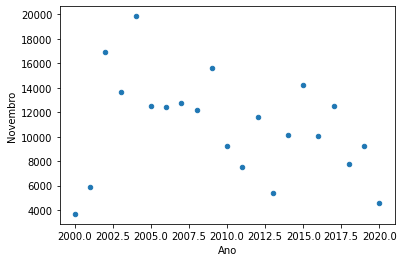

In [125]:
max_nov = df.max()["Novembro"]
min_nov = df.min()["Novembro"]
med_nov = df.mean()["Novembro"]
desv_nov = df.std()["Novembro"]
df.plot.scatter(x='Ano',y="Novembro")
print(f"Maxímo: {max_nov} \nMínimo: {min_nov} \nMédia: {med_nov} \nDesvio: {desv_nov}")

In [126]:
hNovembro = px.histogram(df,x='Novembro')
hNovembro.show()

In [127]:
px.box(df['Novembro'])

###Dezembro

Maxímo: 12603.0 
Mínimo: 1380.0 
Média: 5111.809523809524 
Desvio: 2758.787987849875


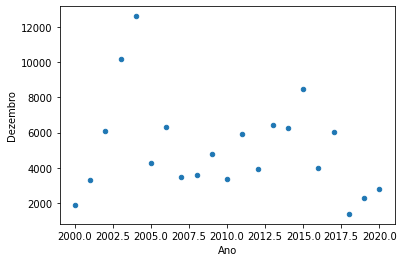

In [128]:
max_dez = df.max()["Dezembro"]
min_dez = df.min()["Dezembro"]
med_dez = df.mean()["Dezembro"]
desv_dez = df.std()["Dezembro"]
df.plot.scatter(x='Ano',y="Dezembro")
print(f"Maxímo: {max_dez} \nMínimo: {min_dez} \nMédia: {med_dez} \nDesvio: {desv_dez}")

In [129]:
hDezembro = px.histogram(df,x='Dezembro')
hDezembro.show()

In [130]:
px.box(df['Dezembro'])

##Gráfico do crescimento histórico Total e Gráfico Meses x N° de focos.

In [131]:
soma_anos = df_transposta.sum()
figAnos = px.bar(soma_anos)
figAnos.update_layout(
    title = '',
    xaxis = dict(title='Anos'),
    yaxis = dict(title='Nº de focos de queimadas'),
    legend_title = 'Nº Focos',
    showlegend = False
)

max_anos = df_transposta.max()
figMaxAnos = px.line(max_anos)
figAnos.show()

In [132]:
#df.drop(['Total','Ano'], axis=1, inplace=True)

In [133]:
grfBarra = go.Bar(
    x = df.columns[:-3], 
    y=df_transposta[2020] ,
    name = 'Ano 2020'
)
grfLinha1 = go.Scatter(
    x = df.columns[:-3], 
    y=df.max(),
    mode='lines+markers',
    name = 'Máximo'
)
grfLinha2 = go.Scatter(
    x = df.columns[:-3], 
    y=df.min(),
    mode='lines+markers',
    name = 'Mínimo'
)
grfLinha3 = go.Scatter(
    x = df.columns[:-3], 
    y=df.mean(),
    mode='lines+markers',
    name = 'Média'
)

dados = [grfBarra,grfLinha1,grfLinha2,grfLinha3]
layout = go.Layout(
    title = '',
    xaxis=dict(title='Meses'),
    yaxis=dict(title='Nº de focos de queimadas')
    
)

fig = go.Figure(data = dados, layout=layout)
fig.show()

##Correlações

In [134]:
df

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
2,72,160,399,59,155,400,1089,9964,8046,6236,3691,1891,32162,2000,2680.166667
3,157,678,1113,400,72,383,1631,14328,13462,7256,5855,3279,48614,2001,4051.166667
4,512,657,872,96,183,694,3585,33263,41759,19099,16917,6103,123740,2002,10311.666667
5,2749,1241,1646,517,556,1563,8081,25687,37595,19480,13658,10165,122938,2003,10244.833333
6,1804,544,558,508,825,2191,10360,32049,52442,17509,19837,12603,151230,2004,12602.500000
7,3652,420,531,242,517,1901,16008,52898,51224,20258,12512,4295,164458,2005,13704.833333
8,1209,622,606,451,400,1715,4804,28432,40201,16408,12438,6304,113590,2006,9465.833333
9,1330,1584,1140,373,918,2694,5249,40064,55304,21095,12741,3458,145950,2007,12162.500000
10,711,397,747,403,357,1241,5129,19740,22348,20438,12190,3564,87265,2008,7272.083333
11,665,283,374,331,414,610,2166,9365,19690,16829,15594,4778,71099,2009,5924.916667


In [135]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
Janeiro,1.000000,0.460708,0.250097,0.162834,0.447533,0.482505,0.671119,0.423820,0.353946,0.394395,0.261649,0.242095,0.498005,0.058010,0.498005
Fevereiro,0.460708,1.000000,0.657102,0.383116,0.438026,0.549788,0.187443,0.437446,0.416271,0.331686,0.160005,-0.005448,0.440458,0.032992,0.440458
Março,0.250097,0.657102,1.000000,0.795889,0.319635,0.291768,0.133738,0.222325,-0.010384,-0.136880,-0.087991,-0.212721,0.084014,0.189504,0.084014
Abril,0.162834,0.383116,0.795889,1.000000,0.516601,0.435581,0.117041,0.126646,-0.083584,-0.224489,-0.040590,-0.061015,0.023924,0.473325,0.023924
Maio,0.447533,0.438026,0.319635,0.516601,1.000000,0.863843,0.392560,0.276333,0.288048,0.088283,0.139886,0.060330,0.325536,0.657571,0.325536
Junho,0.482505,0.549788,0.291768,0.435581,0.863843,1.000000,0.560921,0.610370,0.589802,0.309440,0.163231,0.101778,0.609636,0.426972,0.609636
Julho,0.671119,0.187443,0.133738,0.117041,0.392560,0.560921,1.000000,0.724702,0.672756,0.460117,0.349150,0.235398,0.759814,0.002461,0.759814
Agosto,0.423820,0.437446,0.222325,0.126646,0.276333,0.610370,0.724702,1.000000,0.852455,0.550870,0.390163,0.087678,0.898676,-0.198091,0.898676
Setembro,0.353946,0.416271,-0.010384,-0.083584,0.288048,0.589802,0.672756,0.852455,1.000000,0.710315,0.646374,0.394541,0.967031,-0.279484,0.967031
Outubro,0.394395,0.331686,-0.136880,-0.224489,0.088283,0.309440,0.460117,0.550870,0.710315,1.000000,0.716083,0.409230,0.769468,-0.191274,0.769468


In [136]:
corr_transposta = df_transposta.corr()
corr_transposta.style.background_gradient(cmap='coolwarm')

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2000,1.000000,0.987429,0.960635,0.935820,0.893557,0.944832,0.938784,0.931461,0.960450,0.820168,0.937624,0.859546,0.974926,0.900808,0.985340,0.944080,0.968981,0.905162,0.851264,0.939281,0.965787
2001,0.987429,1.000000,0.984514,0.959033,0.939200,0.962775,0.969570,0.961391,0.939916,0.817796,0.966190,0.889418,0.982175,0.907478,0.986016,0.950396,0.958945,0.940746,0.882738,0.952466,0.963948
2002,0.960635,0.984514,1.000000,0.983517,0.975526,0.953921,0.993977,0.984963,0.948027,0.869363,0.958668,0.939897,0.993181,0.933956,0.979337,0.971914,0.955919,0.977432,0.946466,0.910264,0.952702
2003,0.935820,0.959033,0.983517,1.000000,0.985928,0.937787,0.989359,0.971358,0.948466,0.884680,0.928306,0.973274,0.979528,0.973702,0.967654,0.978944,0.953659,0.988825,0.963040,0.855415,0.944317
2004,0.893557,0.939200,0.975526,0.985928,1.000000,0.928343,0.986242,0.967541,0.898106,0.855416,0.929019,0.967904,0.958087,0.940673,0.939029,0.951607,0.915947,0.994797,0.962711,0.849957,0.909787
2005,0.944832,0.962775,0.953921,0.937787,0.928343,1.000000,0.957287,0.965242,0.891944,0.718120,0.990056,0.838741,0.945276,0.854941,0.930730,0.883428,0.947372,0.939938,0.884895,0.960533,0.982430
2006,0.938784,0.969570,0.993977,0.989359,0.986242,0.957287,1.000000,0.993872,0.929515,0.847702,0.962279,0.949047,0.981041,0.941484,0.961688,0.961292,0.940796,0.987183,0.961526,0.889862,0.955694
2007,0.931461,0.961391,0.984963,0.971358,0.967541,0.965242,0.993872,1.000000,0.912791,0.805694,0.974492,0.915682,0.968501,0.910792,0.941185,0.933749,0.927187,0.972320,0.953966,0.897980,0.965426
2008,0.960450,0.939916,0.948027,0.948466,0.898106,0.891944,0.929515,0.912791,1.000000,0.926658,0.865585,0.914159,0.976382,0.939721,0.968313,0.972918,0.974518,0.922755,0.913943,0.839161,0.929847
2009,0.820168,0.817796,0.869363,0.884680,0.855416,0.718120,0.847702,0.805694,0.926658,1.000000,0.698195,0.931562,0.896778,0.908932,0.882318,0.944844,0.862974,0.867621,0.891350,0.646952,0.751678
